<a href="https://colab.research.google.com/github/AnantVerma-2022/Forcasting-Airline-Passenges-using-ARIMA-and-SARIMA/blob/main/AirlinePassengerForcatingWithARIMA-SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Question 1-3**

# Problem Statement: 


---



### Implement the ARIMA model on top of the "Air Passengers" datase and store the result in mod_time.


---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

Reading csv from drive

In [3]:

from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [4]:
import io

airPassenger = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']))
print(airPassenger)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


Dataset Information

In [6]:
def check_dataset(df):
    print("*"*100)
    print("Dimension of dataset: ({},{})".format(df.shape[0],df.shape[1]))
    print("*"*100)
    print("Dataset columns: ", df.columns)
    print("*"*100)
    print("Data type of features:\n")
    print(df.dtypes)
    print("*"*100)
    print("Missing Values\n")
    print(df.isnull().sum())
    print("*"*100)
    print("NAN Values\n")
    print(df.isna().sum())
    print("*"*100)
    print("Number of unique values\n")
    print(df.nunique())
    print("*"*100)
check_dataset(airPassenger)

****************************************************************************************************
Dimension of dataset: (144,2)
****************************************************************************************************
Dataset columns:  Index(['Month', '#Passengers'], dtype='object')
****************************************************************************************************
Data type of features:

Month          object
#Passengers     int64
dtype: object
****************************************************************************************************
Missing Values

Month          0
#Passengers    0
dtype: int64
****************************************************************************************************
NAN Values

Month          0
#Passengers    0
dtype: int64
****************************************************************************************************
Number of unique values

Month          144
#Passengers    118
dtype: int64
******************

Exploratory Data Analysis

In [7]:
airPassenger["Month"] = pd.to_datetime(airPassenger["Month"])
airPassenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
airpassenger = airPassenger.rename(columns={"Month":"Date","#Passengers":"Passenger"},inplace = True)

airPassenger = airPassenger.set_index("Date")

airPassenger.head()

,Passenger
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
airPassenger.sample(10)

,Passenger
Date,
1959-05-01,420
1953-02-01,196
1958-03-01,362
1952-09-01,209
1954-06-01,264
1950-10-01,133
1956-07-01,413
1957-09-01,404
1949-02-01,118


In [10]:
airPassenger = airPassenger.reset_index()

In [11]:
airPassenger.head()

,Date,Passenger
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
print("End Date:\n ")
print(airPassenger["Date"].max())

End Date:
 
1960-12-01 00:00:00


In [13]:
print("Start Date:\n ")
print(airPassenger["Date"].min())

Start Date:
 
1949-01-01 00:00:00


In [14]:
print("Total number of observations day: \n")
print(airPassenger["Date"].max() - airPassenger["Date"].min())

Total number of observations day: 

4352 days 00:00:00


In [15]:
airPassenger = airPassenger.set_index("Date")
airPassenger.head(5)

,Passenger
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Viualization:



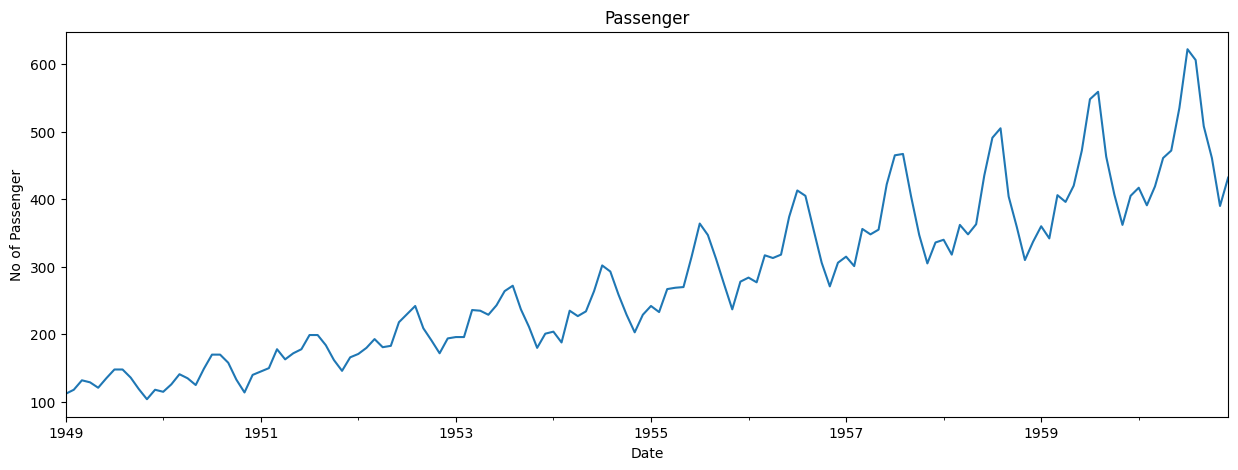

In [16]:
print("Viualization:\n")
airPassenger["Passenger"].plot(figsize = (15,5))
plt.title("Passenger")
plt.xlabel("Date")
plt.ylabel("No of Passenger")
plt.show()

Viualization for 1 year:



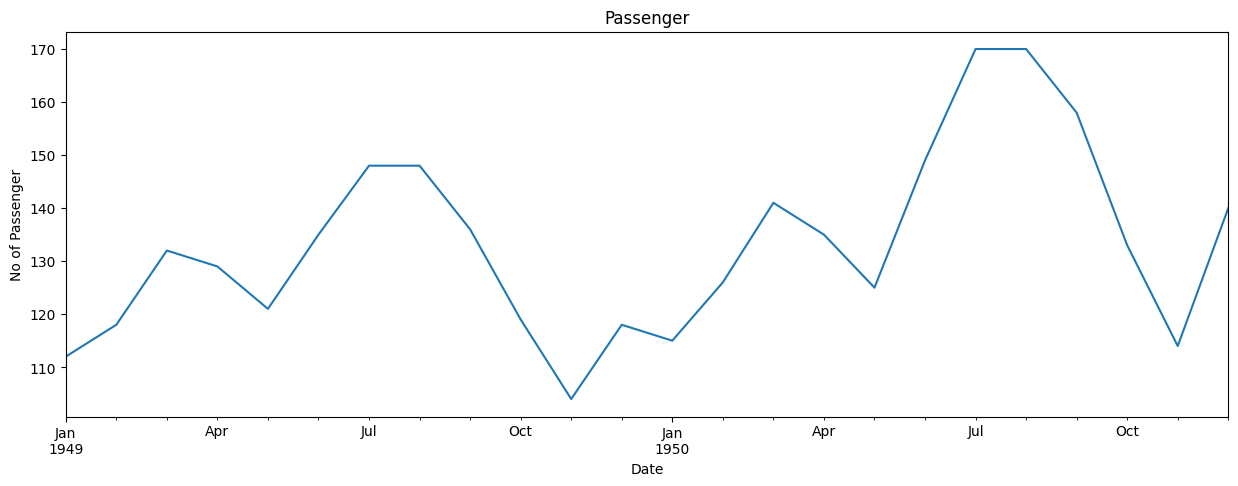

In [17]:
print("Viualization for 1 year:\n")
airPassenger["Passenger"][:24].plot(figsize = (15,5))
plt.title("Passenger")
plt.xlabel("Date")
plt.ylabel("No of Passenger")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

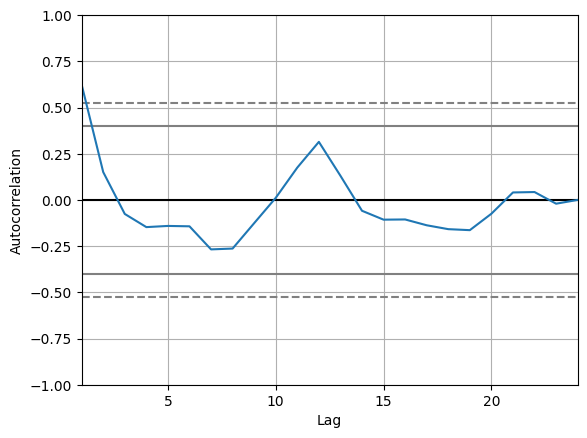

In [18]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(airPassenger["Passenger"][:24])

From the above visualization, data is showing increasing trand and seasonality. 

Let's explore bit more.

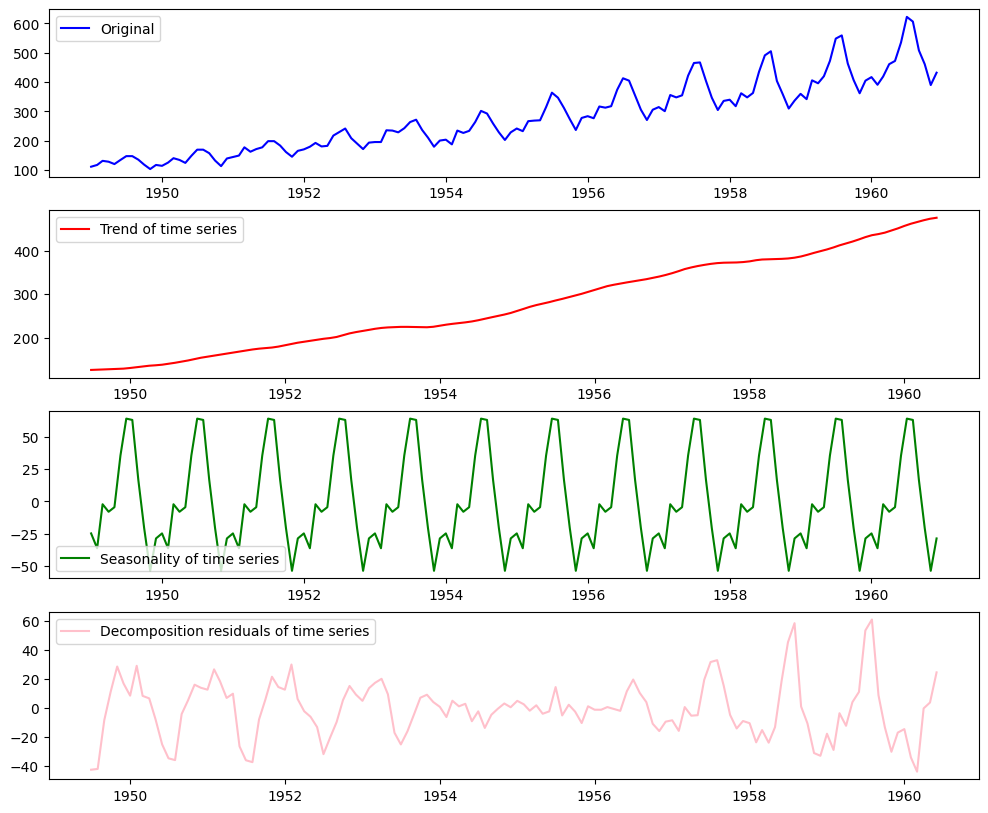

In [19]:
#Decomposing the Time-Series into Trends and Seassionality

from statsmodels.tsa.seasonal import seasonal_decompose

#Additive Model

seasonal_add = seasonal_decompose(airPassenger, model = "additive", period = 12)
 
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(airPassenger,label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal_add.trend,label='Trend of time series',color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_add.seasonal,label='Seasonality of time series',color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(seasonal_add.resid,label='Decomposition residuals of time series',color='pink')
plt.legend(loc='best')
plt.show()

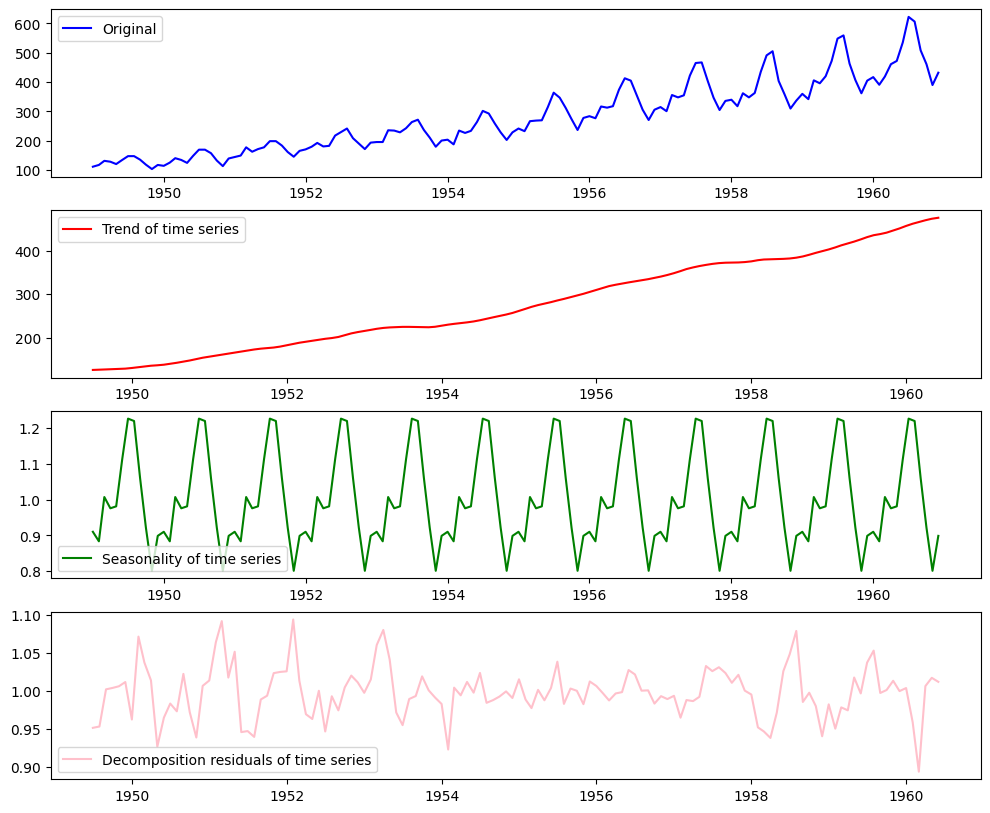

In [20]:
#Multiplicative Model

seasonal_mul = seasonal_decompose(airPassenger, model = "multiplicative", period = 12)
 
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(airPassenger,label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal_mul.trend,label='Trend of time series',color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_mul.seasonal,label='Seasonality of time series',color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(seasonal_mul.resid,label='Decomposition residuals of time series',color='pink')
plt.legend(loc='best')
plt.show()

In [21]:
airPassenger["Passenger:10 days rolling"] = airPassenger["Passenger"].rolling(window=10,min_periods=1).mean()
airPassenger.head(12)

,Passenger,Passenger:10 days rolling
Date,,
1949-01-01,112,112.000000
1949-02-01,118,115.000000
1949-03-01,132,120.666667
1949-04-01,129,122.750000
1949-05-01,121,122.400000
1949-06-01,135,124.500000
1949-07-01,148,127.857143
1949-08-01,148,130.375000
1949-09-01,136,131.000000


In [22]:
airPassenger["Passenger:30 days rolling"] = airPassenger["Passenger"].rolling(window=30,min_periods=1).mean()
airPassenger.head(35)

,Passenger,Passenger:10 days rolling,Passenger:30 days rolling
Date,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,115.000000,115.000000
1949-03-01,132,120.666667,120.666667
1949-04-01,129,122.750000,122.750000
1949-05-01,121,122.400000,122.400000
1949-06-01,135,124.500000,124.500000
1949-07-01,148,127.857143,127.857143
1949-08-01,148,130.375000,130.375000
1949-09-01,136,131.000000,131.000000


Text(0.5, 1.0, 'Rolling mean Plot')

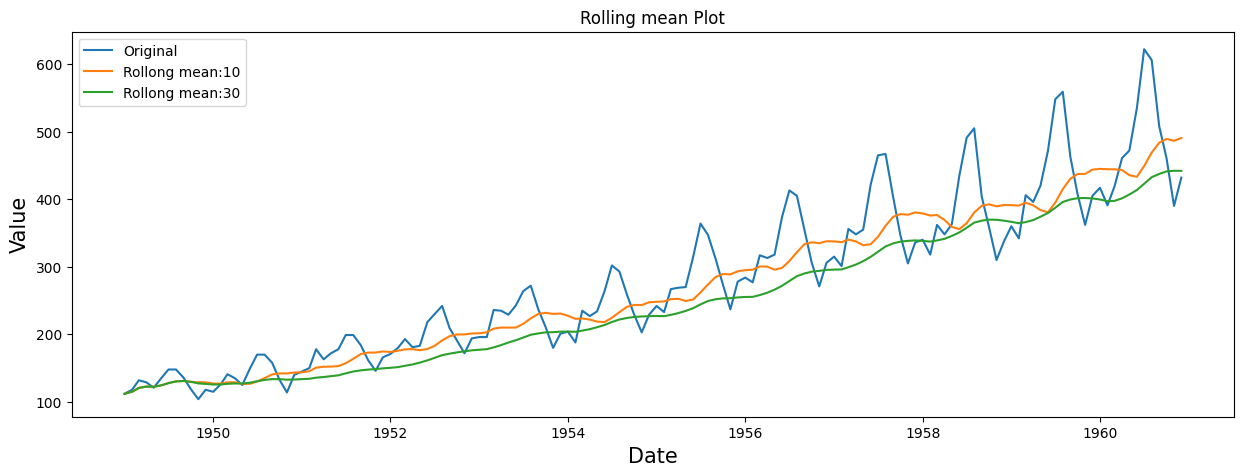

In [23]:
plt.figure(figsize = (15,5))
plt.plot(airPassenger[["Passenger","Passenger:10 days rolling","Passenger:30 days rolling"]], label = ["Original","Rollong mean:10","Rollong mean:30"])
plt.legend(loc="best")

plt.xlabel("Date", size = 15)
plt.ylabel("Value", size = 15)
plt.title("Rolling mean Plot")

In [24]:
airPassenger["Passenger:10 days rolling_STD"] = airPassenger["Passenger"].rolling(window=10,min_periods=1).std()
airPassenger["Passenger:30 days rolling_STD"] = airPassenger["Passenger"].rolling(window=30,min_periods=1).std()
airPassenger.head(20)

,Passenger,Passenger:10 days rolling,Passenger:30 days rolling,Passenger:10 days rolling_STD,Passenger:30 days rolling_STD
Date,,,,,
1949-01-01,112,112.000000,112.000000,NaN,NaN
1949-02-01,118,115.000000,115.000000,4.242641,4.242641
1949-03-01,132,120.666667,120.666667,10.263203,10.263203
1949-04-01,129,122.750000,122.750000,9.358597,9.358597
1949-05-01,121,122.400000,122.400000,8.142481,8.142481
1949-06-01,135,124.500000,124.500000,8.916277,8.916277
1949-07-01,148,127.857143,127.857143,12.047525,12.047525
1949-08-01,148,130.375000,130.375000,13.233480,13.233480
1949-09-01,136,131.000000,131.000000,12.519984,12.519984


Text(0.5, 1.0, 'Rolling mean Plot')

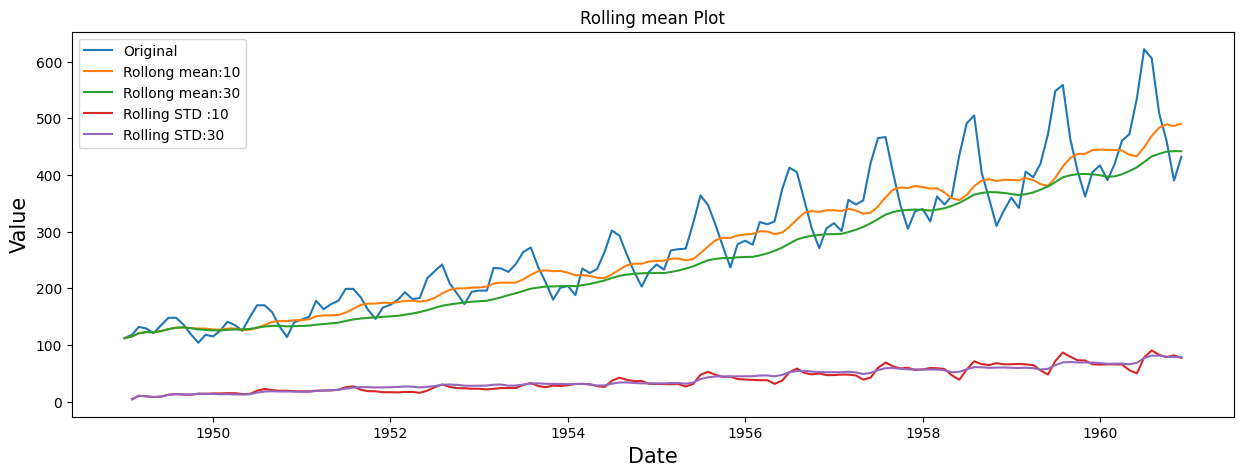

In [25]:
plt.figure(figsize = (15,5))
plt.plot(airPassenger[["Passenger","Passenger:10 days rolling","Passenger:30 days rolling","Passenger:10 days rolling_STD",
                       "Passenger:30 days rolling_STD"]], label = ["Original","Rollong mean:10","Rollong mean:30","Rolling STD :10","Rolling STD:30"])
plt.legend(loc="best")

plt.xlabel("Date", size = 15)
plt.ylabel("Value", size = 15)
plt.title("Rolling mean Plot")

Here, we can see rolling mean has the trend and showing increasing trend even though rolling standard deviation is fairly constant with the time. So for more clearification let's perform Augumented Deicky Fuller Test.

Check Stationarity with AD Fuller Test.

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(airPassenger["Passenger"])
print("ADF Statistics: {}".format(result[0]))
print("*"*50)
print("p-value: {}".format(result[1]))
print("*"*50)
print("Lags used: {}".format(result[2]))
print("*"*50)
print("No of observation used: {}".format(result[3]))
print("*"*50)
print("Critical Values:")
for k,v in result[4].items():
    
    print("{} : {}".format(k,v))

ADF Statistics: 0.8153688792060528
**************************************************
p-value: 0.9918802434376411
**************************************************
Lags used: 13
**************************************************
No of observation used: 130
**************************************************
Critical Values:
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598


* Here the p-value > 0.05 that means week evidance against the null hupothesis, time series has a unique root and indicating it is non-stationary.

* Make Time Series Stationary : Differencing Technique

In [27]:
airPassenger["Passengers 12 Difference"] = airPassenger["Passenger"] - airPassenger["Passenger"].shift(12)
airPassenger.head(10)

,Passenger,Passenger:10 days rolling,Passenger:30 days rolling,Passenger:10 days rolling_STD,Passenger:30 days rolling_STD,Passengers 12 Difference
Date,,,,,,
1949-01-01,112,112.000000,112.000000,NaN,NaN,NaN
1949-02-01,118,115.000000,115.000000,4.242641,4.242641,NaN
1949-03-01,132,120.666667,120.666667,10.263203,10.263203,NaN
1949-04-01,129,122.750000,122.750000,9.358597,9.358597,NaN
1949-05-01,121,122.400000,122.400000,8.142481,8.142481,NaN
1949-06-01,135,124.500000,124.500000,8.916277,8.916277,NaN
1949-07-01,148,127.857143,127.857143,12.047525,12.047525,NaN
1949-08-01,148,130.375000,130.375000,13.233480,13.233480,NaN
1949-09-01,136,131.000000,131.000000,12.519984,12.519984,NaN


In [28]:
result_12 = adfuller(airPassenger["Passengers 12 Difference"].dropna())
print("ADF Statistics: {}".format(result_12[0]))
print("*"*50)
print("p-value: {}".format(result_12[1]))
print("*"*50)
print("Lags used: {}".format(result[2]))
print("*"*50)
print("No of observation used: {}".format(result[3]))
print("*"*50)
print("Critical Values:")
for k,v in result_12[4].items():
    
    print("{} : {}".format(k,v))

ADF Statistics: -3.383020726492481
**************************************************
p-value: 0.011551493085514952
**************************************************
Lags used: 13
**************************************************
No of observation used: 130
**************************************************
Critical Values:
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598


* Here, p < 0.05
* Strong evidance against null hypothesis and reject the null hypothesis.
* Data has unit root and is stationary.

<Axes: xlabel='Date'>

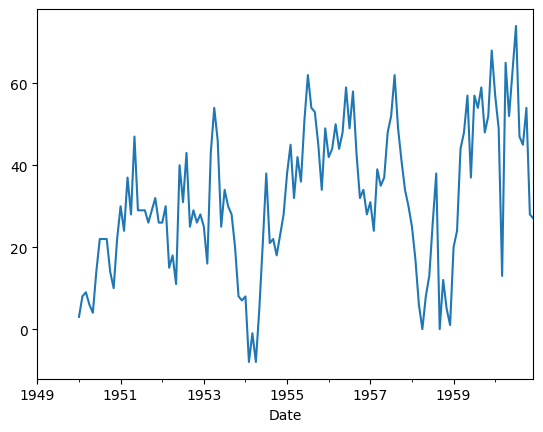

In [29]:
airPassenger["Passengers 12 Difference"].plot()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



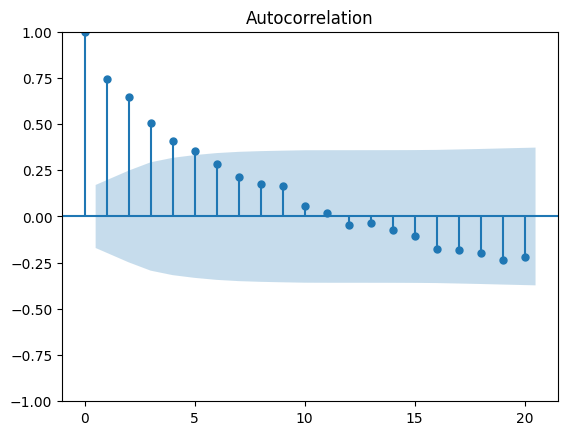

In [31]:
acf = plot_acf(airPassenger["Passengers 12 Difference"].dropna(), lags = 20)

q = 5

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


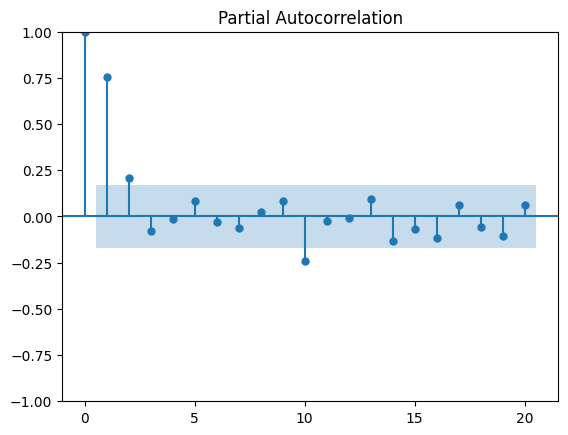

In [32]:
pacf = plot_pacf(airPassenger["Passengers 12 Difference"].dropna(), lags = 20)

Here, p = 2

In [33]:
#!pip install pandas.tools

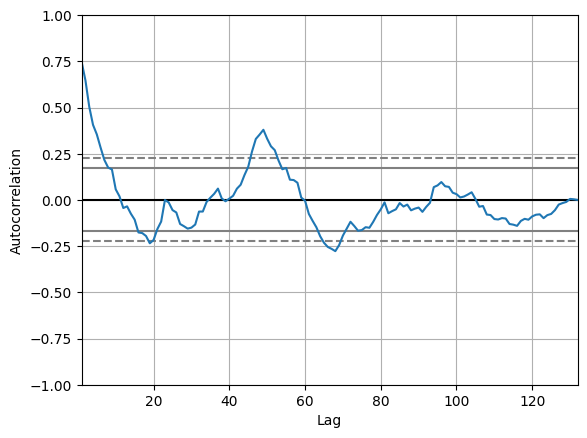

In [34]:
from statsmodels.graphics.utils import lrange
#from p.tools.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(airPassenger["Passengers 12 Difference"].dropna())
plt.show()

## **Model Building with ARIMA**

In [35]:
from datetime import datetime,timedelta
train_end = datetime(1957,12,1)
test_end = datetime(1960,12,1)

In [36]:
train = airPassenger[:train_end]
test = airPassenger[train_end+timedelta(days=1):test_end]

In [37]:
train

,Passenger,Passenger:10 days rolling,Passenger:30 days rolling,Passenger:10 days rolling_STD,Passenger:30 days rolling_STD,Passengers 12 Difference
Date,,,,,,
1949-01-01,112,112.000000,112.000000,NaN,NaN,NaN
1949-02-01,118,115.000000,115.000000,4.242641,4.242641,NaN
1949-03-01,132,120.666667,120.666667,10.263203,10.263203,NaN
1949-04-01,129,122.750000,122.750000,9.358597,9.358597,NaN
1949-05-01,121,122.400000,122.400000,8.142481,8.142481,NaN
...,...,...,...,...,...,...
1957-08-01,467,360.600000,330.033333,68.994686,59.060742,62.0
1957-09-01,404,373.900000,334.600000,62.297583,59.314823,49.0
1957-10-01,347,378.000000,337.200000,58.569996,58.035899,41.0


In [38]:
test

,Passenger,Passenger:10 days rolling,Passenger:30 days rolling,Passenger:10 days rolling_STD,Passenger:30 days rolling_STD,Passengers 12 Difference
Date,,,,,,
1958-01-01,340,378.9,338.266667,56.785072,56.617856,25.0
1958-02-01,318,375.9,337.300000,59.334176,56.711095,17.0
1958-03-01,362,376.6,338.966667,59.101043,56.676629,6.0
1958-04-01,348,369.2,341.433333,57.392992,55.346360,0.0
1958-05-01,363,359.0,345.633333,46.506869,51.816309,8.0
1958-06-01,435,355.8,350.866667,38.694817,52.671221,13.0
1958-07-01,491,364.5,357.766667,56.445155,56.991036,26.0
1958-08-01,505,380.3,365.366667,71.189965,60.916270,38.0
1958-09-01,404,390.2,368.266667,66.268478,60.604389,0.0


In [39]:
# Prediction Period

pred_start = test.index[0]
pred_end = test.index[-1]

In [40]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

modelArima = sm.tsa.arima.ARIMA(airPassenger["Passenger"], order = (2,1,5))
result = modelArima.fit()
result.summary()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Passenger   No. Observations:                  144
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -670.235
Date:                Sun, 23 Apr 2023   AIC                           1356.469
Time:                        06:47:52   BIC                           1380.172
Sample:                    01-01-1949   HQIC                          1366.101
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9222      0.065     14.121      0.000       0.794       1.050
ar.L2         -0.7866      0.051    -15.415      0.000      -0.887      -0.687
ma.L1         -0.6935      0.183     -3.792      0.000      -1.052      -0.335
ma.L2          0.3665      0.561      0.653      0.514      -0.733       1.466
ma.L3          0.3921      0.136      2.888      0.004       0.126       0.658
ma.L4         -0.6669      0.370     -1.800      0.072      -1.393       0.059
ma.L5          0.0097      0.102      0.095      0.924      -0.190       0.209
sigma2       654.2408    372.351      1.757      0.079     -75.553    1384.035
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.58   Prob(JB):                         0.65
Heteroskedasticity (H):               6.11   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
pred_start = test.index[0]
pred_end = test.index[-1]
print(pred_start)
print(pred_end)

1958-01-01 00:00:00
1960-12-01 00:00:00


In [42]:
pred = result.predict(start = pred_start,end = pred_end)
residuals = test["Passenger"]-pred

In [43]:
residuals

Date
1958-01-01   -46.823088
1958-02-01   -42.334648
1958-03-01    31.734493
1958-04-01     5.087179
1958-05-01    40.340371
1958-06-01    33.438096
1958-07-01    29.525352
1958-08-01    14.911216
1958-09-01   -56.551393
1958-10-01    25.037131
1958-11-01   -36.562015
1958-12-01    34.354151
1959-01-01   -50.974968
1959-02-01   -33.930882
1959-03-01    55.599410
1959-04-01     9.867214
1959-05-01    50.166245
1959-06-01     9.599140
1959-07-01    68.890471
1959-08-01    12.308812
1959-09-01   -33.021887
1959-10-01    -6.945325
1959-11-01   -21.574198
1959-12-01    48.348313
1960-01-01   -41.242113
1960-02-01   -44.592142
1960-03-01    12.266469
1960-04-01    68.057128
1960-05-01    26.646012
1960-06-01    46.448732
1960-07-01    42.113409
1960-08-01     0.225585
1960-09-01   -30.782175
1960-10-01    23.394366
1960-11-01   -50.503853
1960-12-01    39.142774
dtype: float64

In [44]:
pred

1958-01-01    386.823088
1958-02-01    360.334648
1958-03-01    330.265507
1958-04-01    342.912821
1958-05-01    322.659629
1958-06-01    401.561904
1958-07-01    461.474648
1958-08-01    490.088784
1958-09-01    460.551393
1958-10-01    333.962869
1958-11-01    346.562015
1958-12-01    302.645849
1959-01-01    410.974968
1959-02-01    375.930882
1959-03-01    350.400590
1959-04-01    386.132786
1959-05-01    369.833755
1959-06-01    462.400860
1959-07-01    479.109529
1959-08-01    546.691188
1959-09-01    496.021887
1959-10-01    413.945325
1959-11-01    383.574198
1959-12-01    356.651687
1960-01-01    458.242113
1960-02-01    435.592142
1960-03-01    406.733531
1960-04-01    392.942872
1960-05-01    445.353988
1960-06-01    488.551268
1960-07-01    579.886591
1960-08-01    605.774415
1960-09-01    538.782175
1960-10-01    437.605634
1960-11-01    440.503853
1960-12-01    392.857226
Freq: MS, Name: predicted_mean, dtype: float64

In [45]:
test["mod_time"] = pred
test

<ipython-input-45-61910705befc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["mod_time"] = pred


,Passenger,Passenger:10 days rolling,Passenger:30 days rolling,Passenger:10 days rolling_STD,Passenger:30 days rolling_STD,Passengers 12 Difference,mod_time
Date,,,,,,,
1958-01-01,340,378.9,338.266667,56.785072,56.617856,25.0,386.823088
1958-02-01,318,375.9,337.300000,59.334176,56.711095,17.0,360.334648
1958-03-01,362,376.6,338.966667,59.101043,56.676629,6.0,330.265507
1958-04-01,348,369.2,341.433333,57.392992,55.346360,0.0,342.912821
1958-05-01,363,359.0,345.633333,46.506869,51.816309,8.0,322.659629
1958-06-01,435,355.8,350.866667,38.694817,52.671221,13.0,401.561904
1958-07-01,491,364.5,357.766667,56.445155,56.991036,26.0,461.474648
1958-08-01,505,380.3,365.366667,71.189965,60.916270,38.0,490.088784
1958-09-01,404,390.2,368.266667,66.268478,60.604389,0.0,460.551393


<Axes: xlabel='Date'>

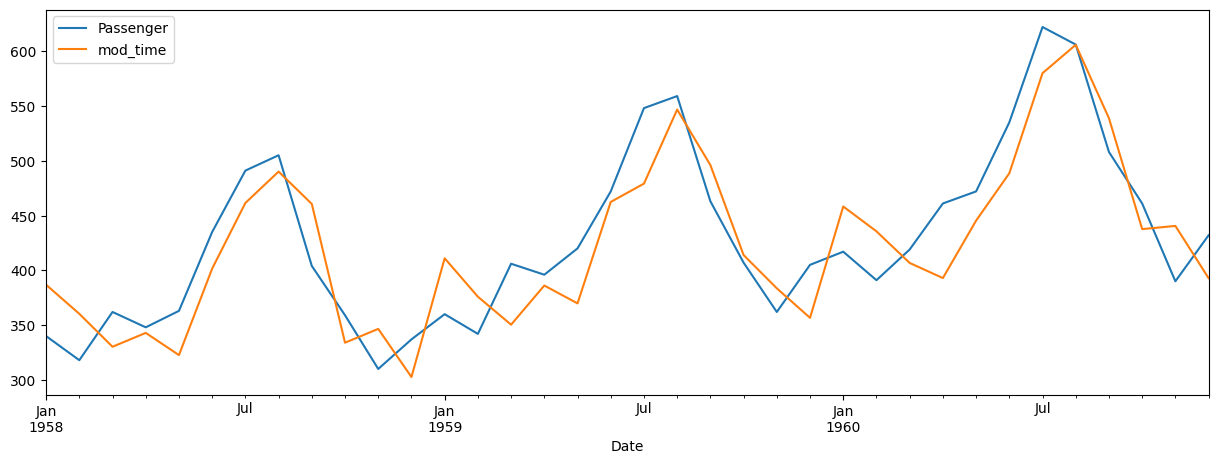

In [46]:
test[["Passenger","mod_time"]].plot(figsize = (15,5))

In [47]:
#Prediction for 20 years

pred_time = result.forecast(steps = 240)

print(pred_time)

1961-01-01    511.095126
1961-02-01    529.458876
1961-03-01    532.953023
1961-04-01    495.453174
1961-05-01    458.498704
                 ...    
1980-08-01    486.825989
1980-09-01    486.825989
1980-10-01    486.825989
1980-11-01    486.825989
1980-12-01    486.825989
Freq: MS, Name: predicted_mean, Length: 240, dtype: float64


<Axes: >

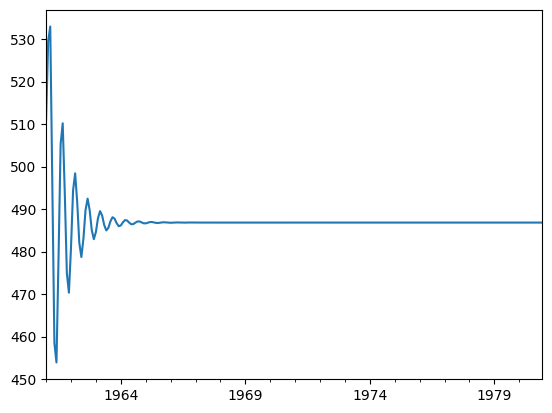

In [48]:
pred_time.plot()

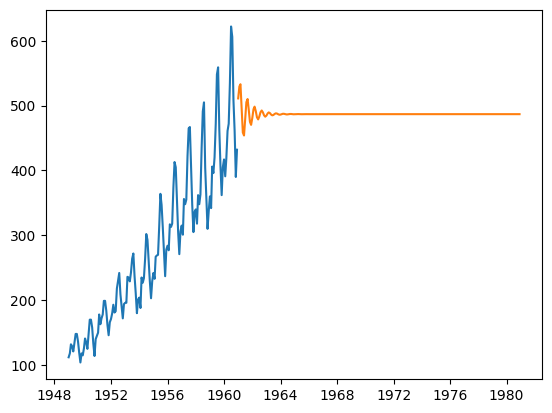

In [49]:
plt.plot(airPassenger["Passenger"])
plt.plot(pred_time)

<Axes: xlabel='Date'>

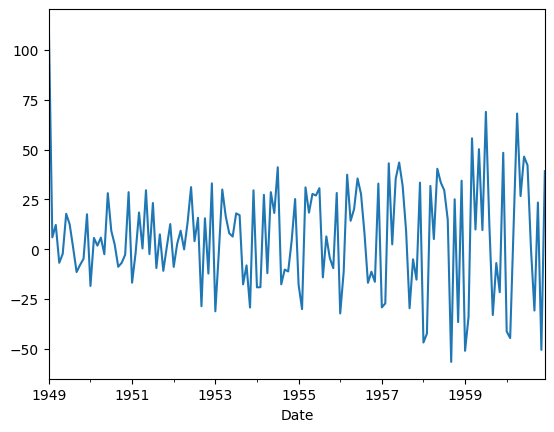

In [50]:
result.resid.plot()

## **SARIMAX MODEL**

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_Sarima = SARIMAX(airPassenger["Passenger"], order = (3,0,5), seasonal_order=(0,1,0,12))

mod_time = model_Sarima.fit()

mod_time.summary()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Passenger   No. Observations:                  144
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -504.836
Date:                             Sun, 23 Apr 2023   AIC                           1027.672
Time:                                     06:49:38   BIC                           1053.617
Sample:                                 01-01-1949   HQIC                          1038.215
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1353      0.045     -2.983      0.003      -0.224      -0.046
ar.L2          0.1276      0.044      2.930      0.003       0.042       0.213
ar.L3          0.9810      0.048     20.289      0.000       0.886       1.076
ma.L1          0.8364      0.098      8.565      0.000       0.645       1.028
ma.L2          0.7849      0.129      6.068      0.000       0.531       1.038
ma.L3         -0.4586      0.148     -3.104      0.002      -0.748      -0.169
ma.L4         -0.2387      0.142     -1.677      0.094      -0.518       0.040
ma.L5         -0.3646      0.094     -3.885      0.000      -0.548      -0.181
sigma2       118.5304     17.159      6.908      0.000      84.900     152.161
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               2.14   Skew:                             0.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
pred_SARIMA = mod_time.predict(start = pred_start,end = pred_end)
residuals_SARIMA = test["Passenger"]-pred_SARIMA

In [53]:
pred_SARIMA

1958-01-01    344.760119
1958-02-01    332.290012
1958-03-01    376.771072
1958-04-01    356.682870
1958-05-01    363.841942
1958-06-01    431.210626
1958-07-01    479.462153
1958-08-01    493.414161
1958-09-01    435.255002
1958-10-01    354.441656
1958-11-01    310.546226
1958-12-01    347.325232
1959-01-01    344.381903
1959-02-01    335.811943
1959-03-01    382.888397
1959-04-01    384.385448
1959-05-01    410.658768
1959-06-01    475.725607
1959-07-01    531.466837
1959-08-01    553.353532
1959-09-01    453.182180
1959-10-01    416.360455
1959-11-01    358.697177
1959-12-01    377.524413
1960-01-01    429.953327
1960-02-01    401.827628
1960-03-01    444.174266
1960-04-01    425.061509
1960-05-01    469.283480
1960-06-01    535.284121
1960-07-01    605.242574
1960-08-01    621.154550
1960-09-01    514.750133
1960-10-01    453.374406
1960-11-01    410.668864
1960-12-01    441.557277
Freq: MS, Name: predicted_mean, dtype: float64

In [54]:
test["Predicted_SARIMA"] = pred_SARIMA
test

<ipython-input-54-b46351fad7ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted_SARIMA"] = pred_SARIMA


,Passenger,Passenger:10 days rolling,Passenger:30 days rolling,Passenger:10 days rolling_STD,Passenger:30 days rolling_STD,Passengers 12 Difference,mod_time,Predicted_SARIMA
Date,,,,,,,,
1958-01-01,340,378.9,338.266667,56.785072,56.617856,25.0,386.823088,344.760119
1958-02-01,318,375.9,337.300000,59.334176,56.711095,17.0,360.334648,332.290012
1958-03-01,362,376.6,338.966667,59.101043,56.676629,6.0,330.265507,376.771072
1958-04-01,348,369.2,341.433333,57.392992,55.346360,0.0,342.912821,356.682870
1958-05-01,363,359.0,345.633333,46.506869,51.816309,8.0,322.659629,363.841942
1958-06-01,435,355.8,350.866667,38.694817,52.671221,13.0,401.561904,431.210626
1958-07-01,491,364.5,357.766667,56.445155,56.991036,26.0,461.474648,479.462153
1958-08-01,505,380.3,365.366667,71.189965,60.916270,38.0,490.088784,493.414161
1958-09-01,404,390.2,368.266667,66.268478,60.604389,0.0,460.551393,435.255002


In [55]:
residuals_SARIMA

Date
1958-01-01    -4.760119
1958-02-01   -14.290012
1958-03-01   -14.771072
1958-04-01    -8.682870
1958-05-01    -0.841942
1958-06-01     3.789374
1958-07-01    11.537847
1958-08-01    11.585839
1958-09-01   -31.255002
1958-10-01     4.558344
1958-11-01    -0.546226
1958-12-01   -10.325232
1959-01-01    15.618097
1959-02-01     6.188057
1959-03-01    23.111603
1959-04-01    11.614552
1959-05-01     9.341232
1959-06-01    -3.725607
1959-07-01    16.533163
1959-08-01     5.646468
1959-09-01     9.817820
1959-10-01    -9.360455
1959-11-01     3.302823
1959-12-01    27.475587
1960-01-01   -12.953327
1960-02-01   -10.827628
1960-03-01   -25.174266
1960-04-01    35.938491
1960-05-01     2.716520
1960-06-01    -0.284121
1960-07-01    16.757426
1960-08-01   -15.154550
1960-09-01    -6.750133
1960-10-01     7.625594
1960-11-01   -20.668864
1960-12-01    -9.557277
dtype: float64

<Axes: xlabel='Date'>

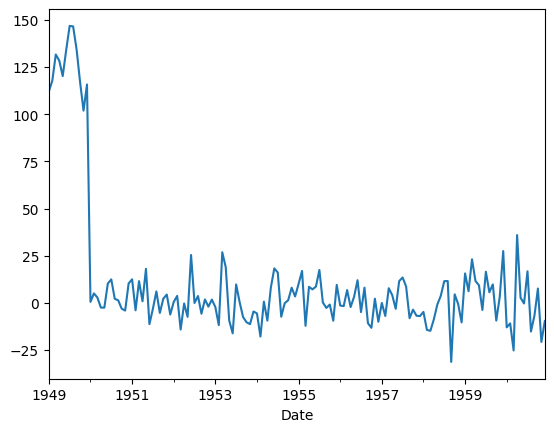

In [56]:
mod_time.resid.plot()

<Axes: xlabel='Date'>

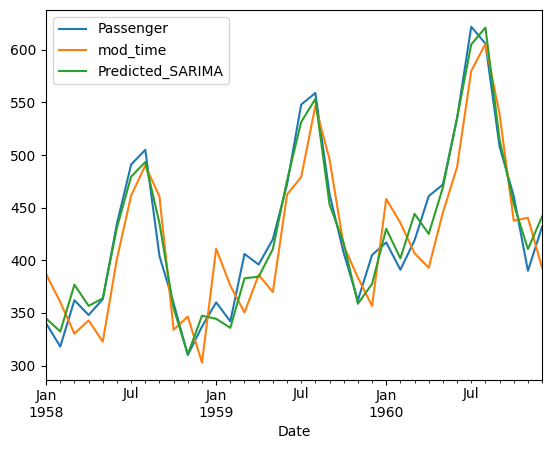

In [58]:
test[["Passenger","mod_time","Predicted_SARIMA"]].plot()

In [60]:
#Prediction for 20 years

pred_time = mod_time.forecast(steps = 240)

print("Prediction for 20 years: \n")
print(pred_time)


Prediction for 20 years: 

1961-01-01    449.331863
1961-02-01    420.154199
1961-03-01    452.203657
1961-04-01    501.750477
1961-05-01    502.800888
                 ...    
1980-08-01    903.706168
1980-09-01    811.144651
1980-10-01    756.898179
1980-11-01    680.669848
1980-12-01    727.788004
Freq: MS, Name: predicted_mean, Length: 240, dtype: float64


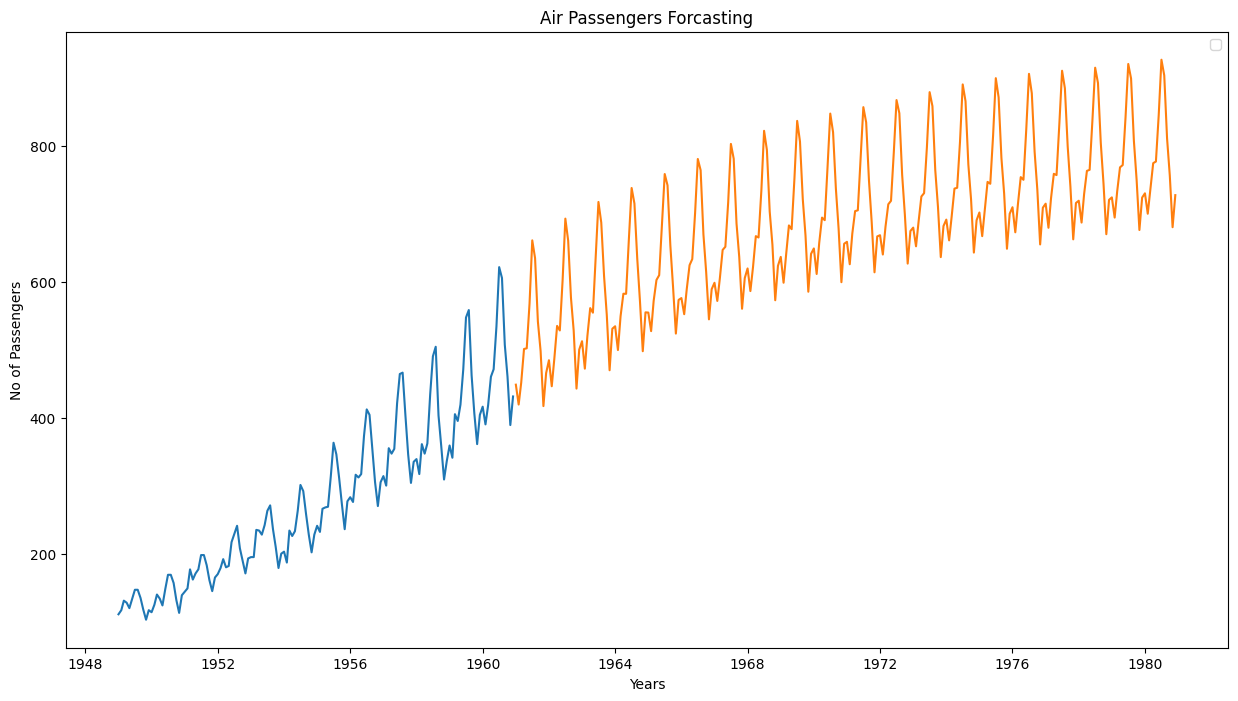

In [62]:
plt.figure(figsize = (15,8))
plt.plot(airPassenger["Passenger"])
plt.plot(pred_time)
plt.title("Air Passengers Forcasting")
plt.xlabel("Years")
plt.ylabel("No of Passengers")
plt.legend()
plt.show()

# **Question 3: ** **Write a short note on Exponential Smothing?**

# **Answer:-** 

### **Exponential Moving Average**

Exponential Moving Average (EMA) is a type of weighted moving average method commonly used in time series analysis. EMA is similar to the Exponential Weighted Moving Average (EWMA) method, but it uses a different formula for calculating the weights.

**To calculate the EMA, you need to follow these steps:**



1.   Choose a smoothing factor, which is a value between 0 and 1 that determines the weight to give to the current and previous data points. The smoothing factor is typically denoted by the symbol alpha (α), and it is often chosen based on the length of the time period being analyzed. For example, if the time period is 30 days, a commonly used value for alpha is 0.1.

2. Start with the first data point in the time series as the first EMA value.

3. Calculate the EMA for the next data point using the formula:

   EMA(n) = α*X(n) + (1-α)*EMA(n-1)

   where X(n) is the current data point and EMA(n-1) is the previous EMA value.

4. Repeat step 3 for all subsequent data points in the time series.

The formula can also be rewritten as:

EMA(n) = αX(n) + (1-α)αX(n-1) + (1-α)^2EMA(n-2) + ...

where X(n) is the current data point, EMA(n-1), EMA(n-2), etc. are the previous EMA values, and alpha is the smoothing factor.

The advantage of EMA is that it gives more weight to recent data points compared to the simple moving average (SMA) or the cumulative moving average (CMA), which can make it more responsive to changes in the data. EMA is also computationally efficient since it only requires the current and previous EMA values.

However, like the EWMA, EMA may not be suitable for capturing long-term trends and may be sensitive to outliers. The choice of the smoothing factor is also important, and selecting an inappropriate value may result in underfitting or overfitting the data.


<Axes: xlabel='Date'>

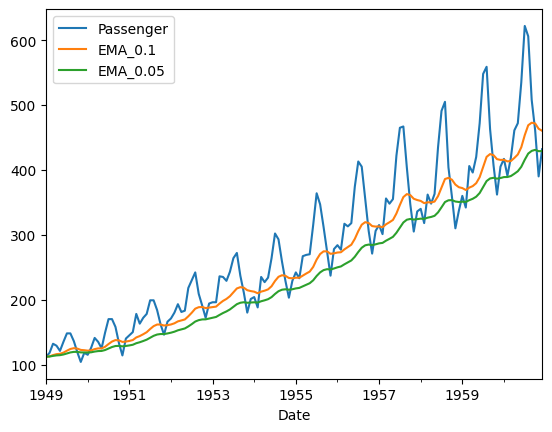

In [63]:
# smoothing factor = 0.1 and 0.05

airPassenger["EMA_0.1"] = airPassenger["Passenger"].ewm(alpha = 0.1, adjust = False).mean()

airPassenger["EMA_0.05"] = airPassenger["Passenger"].ewm(alpha = 0.05, adjust = False).mean()

airPassenger[["Passenger","EMA_0.1","EMA_0.05"]].plot()

# **Question 5: Explain ARIMA approach briefly**

# **Answer:-**

ARIMA (Autoregressive Integrated Moving Average) is a time series forecasting method that models the dependence between an observation and a lagged (i.e., previous) value of the same series, as well as any trends or seasonal patterns in the data.

The approach involves three components:

* Autoregression (AR): this is the process of modeling the dependence between an observation and a number of lagged observations.
* Integration (I): this is the process of differencing the time series to remove any trends or seasonality, making it stationary.
* Moving Average (MA): this is the process of modeling the dependence between an observation and a residual error from a moving average model applied to lagged observations.

Step 1: 

* Decompese the data

* Check for stationarity --> ADF test

Step 2: 

If it is not stationarity, make it stationary by using Differencing Techniques or somethimes np.log with the feature variable.

Step 3: 

Devide data into Train and Test.

Step 4: 

Apply the model
